In [3]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('C:/Users/PranjalJo/datasets/apps.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps['App'].count())

# Have a look at a random sample of 5 entries
fill = apps[apps['Category']=='WEATHER']

fill.head()

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2869,3626,The Weather Channel: Rain Forecast & Storm Alerts,WEATHER,4.4,1558437,NaN,"50,000,000+",Free,0,Everyone,Weather,"August 1, 2018",Varies with device,Varies with device
2870,3627,Weather forecast,WEATHER,4.8,159455,10M,"1,000,000+",Free,0,Everyone,Weather,"May 8, 2018",1.11.93,4.4 and up
2871,3628,AccuWeather: Daily Forecast & Live Weather Rep...,WEATHER,4.4,2053404,NaN,"50,000,000+",Free,0,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device
2872,3629,Live Weather Pro,WEATHER,4.8,892,17M,"10,000+",Free,0,Everyone,Weather,"July 17, 2018",1.1,4.4 and up
2873,3630,"Weather by WeatherBug: Forecast, Radar & Alerts",WEATHER,4.5,981995,NaN,"10,000,000+",Free,0,Everyone,Weather,"June 7, 2018",Varies with device,Varies with device


In [20]:
chars_to_remove = ['+',',','M','$']
cols_to_clean = ['Installs','Size','Price']

# Loop for each column
for col in cols_to_clean:
    # Replace the characters in each column col with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])
apps.tail()

ValueError: Unable to parse string "10,000+" at position 0

In [3]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = apps['Category'].value_counts().count()
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them for easier plotting
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)


Number of categories =  33


In [4]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating'],
        xbins = {'start': 1, 'size': 0.1, 'end' : 5}
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


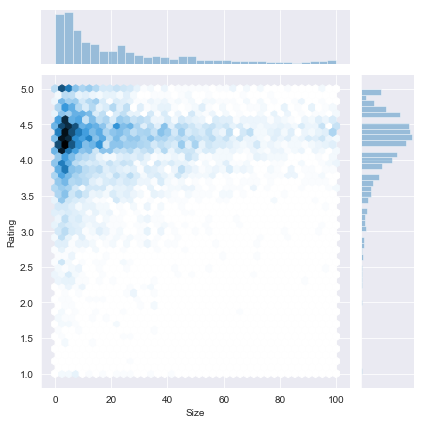

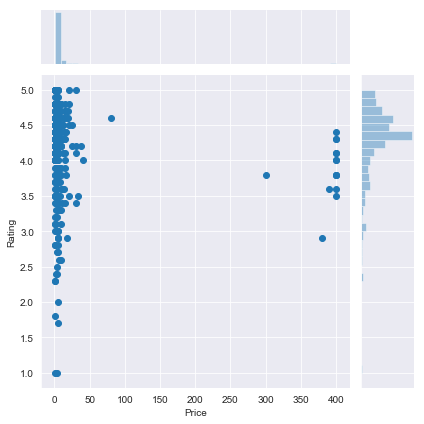

In [5]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1=sns.jointplot(x = 'Size', y = 'Rating', data = large_categories, kind = 'hex')

# Subset for paid apps only
paid_apps = apps[apps.Price>0]

# Plot price vs. rating
plt2=sns.jointplot(x = 'Price', y = 'Rating', data = paid_apps)

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


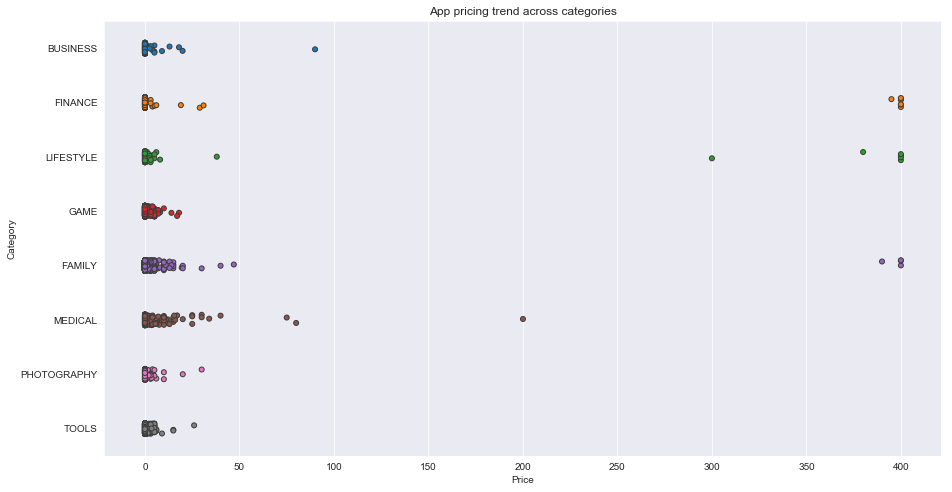

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend for the subset of categories
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Category, Name and Price of apps priced above $200
apps_above_200 = apps[apps['Price']>200].loc[:,['Category','App','Price']]
apps_above_200


Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

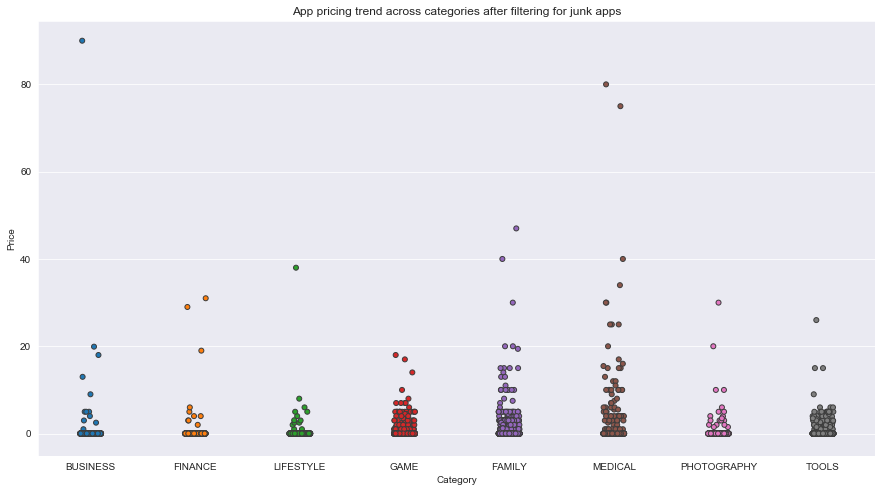

In [7]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x='Category', y='Price', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')


In [8]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps.Price>0]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps.Price==0]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

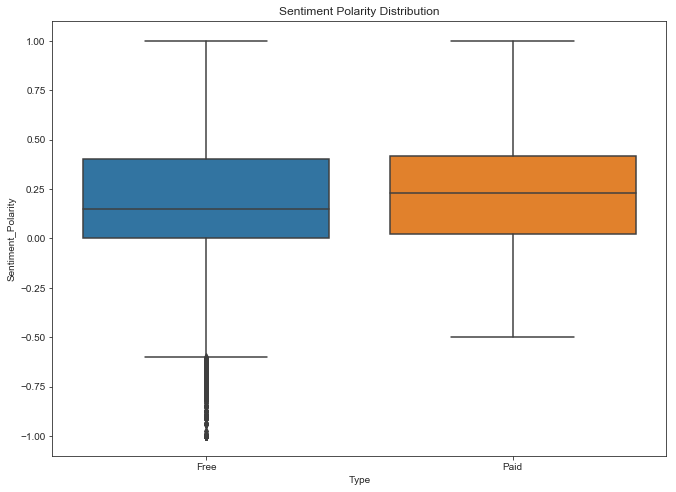

In [9]:
# Load user_reviews.csv
reviews_df = pd.read_csv('C:/Users/PranjalJo/datasets/user_reviews.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y ='Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')
